In [9]:
import random
def get_scale(
          bright_scale=0.1,
          contrast_scale=0.1,
          saturation_scale=0.1,
          hue_scale=0.1):
    brightness_factor = random.uniform(bright_scale, bright_scale+0.01)  
    contrast_factor = random.uniform(contrast_scale,contrast_scale+0.01)
    saturation_factor = random.uniform(saturation_scale, saturation_scale+0.01)
    hue_factor = random.uniform(hue_scale, hue_scale+0.01)
    print("brightness_factor={}".format(brightness_factor))
    print("contrast_factor={}".format(contrast_factor))
    print("saturation_factor={}".format(saturation_factor))
    print("hue_factor={}".format(hue_factor))


In [10]:
import numpy as np

min = 0.1
max = 1.0
# 创建一个4x10的矩阵，每一行的内容都是相同的数字序列
matrix = np.array([np.linspace(min, max, 10)] * 4)

print(matrix)
for bright_scale in matrix[0]:
  for contrast_scale in matrix[1]:
    for saturation_scale in matrix[2]:
      for hue_scale in matrix[3]:
            get_scale(
                    bright_scale=0.1,
                    contrast_scale=0.1,
                    saturation_scale=0.1,
                    hue_scale=0.1)

[[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]]
brightness_factor=0.1011472063955723
contrast_factor=0.10134229908998879
saturation_factor=0.10790981187091596
hue_factor=0.10856960844614418
brightness_factor=0.10963856289994255
contrast_factor=0.10039283947835567
saturation_factor=0.10877271652892498
hue_factor=0.10200397340657877
brightness_factor=0.1043748984567223
contrast_factor=0.1013034043810879
saturation_factor=0.10585032246962875
hue_factor=0.10749712600013728
brightness_factor=0.1066001524999108
contrast_factor=0.10302949571651862
saturation_factor=0.1016646840564539
hue_factor=0.10567910897884181
brightness_factor=0.10338405526529161
contrast_factor=0.10095362774159818
saturation_factor=0.10972699195357741
hue_factor=0.10744288039298622
brightness_factor=0.10050033136176376
contrast_factor=0.10037896489599277
saturation_factor=0.10102131242164147
hue_f

In [12]:
# CPU的并行计算
import numpy as np
import multiprocessing

min_value = 0.1
max_value = 1.0

# 创建一个4x10的矩阵，每一行的内容都是相同的数字序列
matrix = np.array([np.linspace(min_value, max_value, 10)] * 4)

# 定义需要并行执行的函数
def process_scale(bright, contrast, saturation, hue):
    # 在这里调用 get_scale() 函数并进行 GPU 运算
    # 注意：需要根据实际情况将 get_scale() 函数的内容替换为你的代码
    result = get_scale(
        bright_scale=bright,
        contrast_scale=contrast,
        saturation_scale=saturation,
        hue_scale=hue
    )
    return result

if __name__ == '__main__':
    # 使用多进程进行并行计算
    with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
        results = pool.starmap(process_scale, [(bright, contrast, saturation, hue) for bright in matrix[0] for contrast in matrix[1] for saturation in matrix[2] for hue in matrix[3]])

    # 处理并行计算的结果
    for result in results:
        # 处理每个结果
        pass


In [1]:
# GPU的并行计算
import numpy as np
import torch
import torch.multiprocessing as mp

min_value = 0.1
max_value = 1.0

# 创建一个4x10的矩阵，每一行的内容都是相同的数字序列
matrix = np.array([np.linspace(min_value, max_value, 10)] * 4)

# 定义需要并行执行的函数
def process_scale(bright, contrast, saturation, hue):
    # 在这里调用 get_scale() 函数并进行 GPU 运算
    # 注意：需要根据实际情况将 get_scale() 函数的内容替换为你的代码
    result = get_scale(
        bright_scale=bright,
        contrast_scale=contrast,
        saturation_scale=saturation,
        hue_scale=hue
    )
    return result

if __name__ == '__main__':
    mp.set_start_method('spawn')  # 设置多进程启动方式为'spawn'，以便在GPU上运行

    # 使用多进程进行并行计算
    with mp.Pool(processes=mp.cpu_count()) as pool:
        results = pool.starmap(process_scale, [(bright, contrast, saturation, hue) for bright in matrix[0] for contrast in matrix[1] for saturation in matrix[2] for hue in matrix[3]])

    # 处理并行计算的结果
    for result in results:
        # 处理每个结果
        pass


In [4]:
import numpy as np
min_value = 0.1
max_value = 0.1

# 创建一个4x10的矩阵，每一行的内容都是相同的数字序列
matrix = np.array([np.linspace(min_value, max_value, 1)] * 4)
print(matrix)

[[0.1]
 [0.1]
 [0.1]
 [0.1]]


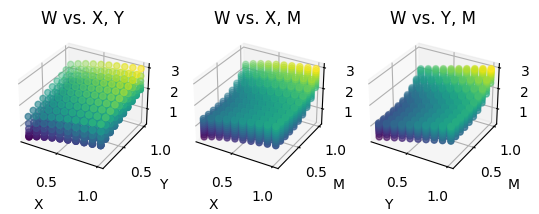

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def f(x, y, m, n):
    return np.sqrt(x) + y + m ** 4 + n ** 3

# 创建 x, y, m, n 的取值范围
x_range = np.arange(0.1, 1.1, 0.1)
y_range = np.arange(0.1, 1.1, 0.1)
m_range = np.arange(0.1, 1.1, 0.1)
n = 0.1  # 固定 n 的值

# 创建一个网格来生成所有可能的组合
x, y, m = np.meshgrid(x_range, y_range, m_range)

# 计算对应的 W
W = f(x, y, m, n)  # 请替换 f(x, y, m, n) 为你的实际函数

# 创建散点图
fig = plt.figure()

# 三个子图，分别展示 x, y, m 与 W 的关系
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(x, y, W, c=W, cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('W')
ax1.set_title('W vs. X, Y')

ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(x, m, W, c=W, cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('M')
ax2.set_zlabel('W')
ax2.set_title('W vs. X, M')

ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(y, m, W, c=W, cmap='viridis')
ax3.set_xlabel('Y')
ax3.set_ylabel('M')
ax3.set_zlabel('W')
ax3.set_title('W vs. Y, M')

# 显示图形
plt.show()


In [14]:
import torch
min_value = 0.1
max_value = 1.0
num_steps = int(10 * max_value)
num_columns = 4
num_repetitions = 10

matrix = np.array([np.linspace(min_value, max_value, num_steps)] * num_columns)

result_shape = tuple(len(matrix[i]) for i in range(num_columns)) + (num_repetitions, num_columns)
result_tensor = torch.zeros(result_shape, dtype=torch.float32)
print(range(result_tensor.shape[-2]))
print(result_tensor.shape)

range(0, 10)
torch.Size([10, 10, 10, 10, 10, 4])


In [25]:
bright_scale=0.5
contrast_scale=0.6
saturation_scale=0.7
hue_scale=0.5
brightness_factor = [bright_scale-0.01, bright_scale]

contrast_factor = [contrast_scale-0.01,contrast_scale]

saturation_factor = [saturation_scale-0.01, saturation_scale]

hue_factor = [hue_scale/2-0.01, hue_scale/2]

print(brightness_factor, contrast_factor, saturation_factor, hue_factor)
import torch
import torchvision.transforms as f
from PIL import Image

img_path = "test.png"
img = Image.open(img_path)
trans1 = f.ColorJitter(brightness=brightness_factor,contrast=contrast_factor, saturation=saturation_factor, hue=hue_factor)
image1 = trans1(img)
image1.show()

trans2 = f.ColorJitter(brightness=bright_scale,contrast=contrast_scale,  saturation=saturation_scale, hue=hue_scale)
image2 = trans2(img)
image2.show()


[0.49, 0.5] [0.59, 0.6] [0.69, 0.7] [0.24, 0.25]


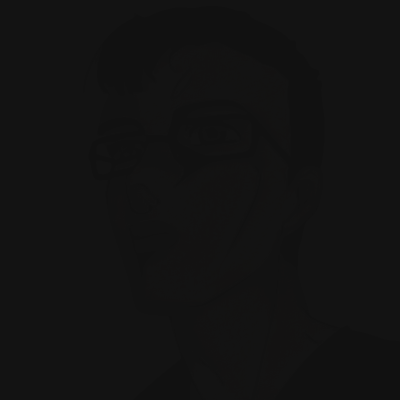

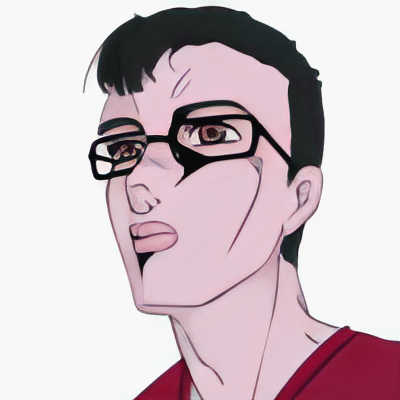

In [29]:
from PIL import Image
import torchvision.transforms as transforms
from IPython.display import display

bright_scale=0.1
contrast_scale=0.1
saturation_scale=0.1
hue_scale=0.1
brightness_factor = [bright_scale-0.01, bright_scale]

contrast_factor = [contrast_scale-0.01,contrast_scale]

saturation_factor = [saturation_scale-0.01, saturation_scale]

hue_factor = [hue_scale/2-0.01, hue_scale/2]

# 读取图像
img_path = "test.png"
img = Image.open(img_path)

# 创建图像处理的转换
transform_1 = transforms.ColorJitter(brightness=brightness_factor, contrast=contrast_factor, saturation=saturation_factor, hue=hue_factor)

# 对图像应用转换
transformed_img_1 = transform_1(img)

# 在笔记本中显示图像
display(transformed_img_1)

trans2 = f.ColorJitter(brightness=bright_scale,contrast=contrast_scale,  saturation=saturation_scale, hue=hue_scale)
transformed_img_2 = trans2(img)
display(transformed_img_2)



In [11]:
min_value = 0.1
max_value = 1.0
num_columns = 4
num_repetitions = 5

import numpy as np
# 创建一个4x10的矩阵，每一行的内容都是相同的数字序列
matrix = np.array([np.linspace(min_value, max_value, int(max_value*num_repetitions))] * num_columns)
print(matrix[3])

[0.1   0.325 0.55  0.775 1.   ]


In [1]:
%load_ext autoreload
%autoreload 2

13
  rk_max_index,rk_max_value,value_Rk_index_max_rk,r0
0  1926,10344834.059430663,291.156793529025,3.086...
1  1930,841593.7854939488,236.89426151291477,3.54...
2  1925,1382417.5143376153,528.0953954436691,3.32...
3  1927,1369009.7988612177,408.48062714470507,3.2...
4  1924,63492467.76357219,649.4018401575042,3.455... yyyyy
  rk_max_index,rk_max_value,value_Rk_index_max_rk,r0
0  1924,875119.6274053213,588.0560115090805,3.424...
1  1928,26321697.927237414,430.34075617355273,3.4...
2  1923,2598512.231625222,459.58778294837526,3.33...
3  1931,655633.9729406942,362.9202106114385,3.184...
4  1926,394794.140163389,297.6404357765327,3.1533... yyyyy
  rk_max_index,rk_max_value,value_Rk_index_max_rk,r0
0  1927,843781.4969635135,295.2753719388521,3.518...
1  1925,2809681.004584898,637.4708201995068,3.236...
2  1929,1104654.0679810012,499.76271394542624,3.6...
3  1929,646423.4346356398,709.2855233993671,3.547...
4  1923,2001398.625290004,573.8688768271838,3.518... yyyyy
  rk_max_index,rk_max_val

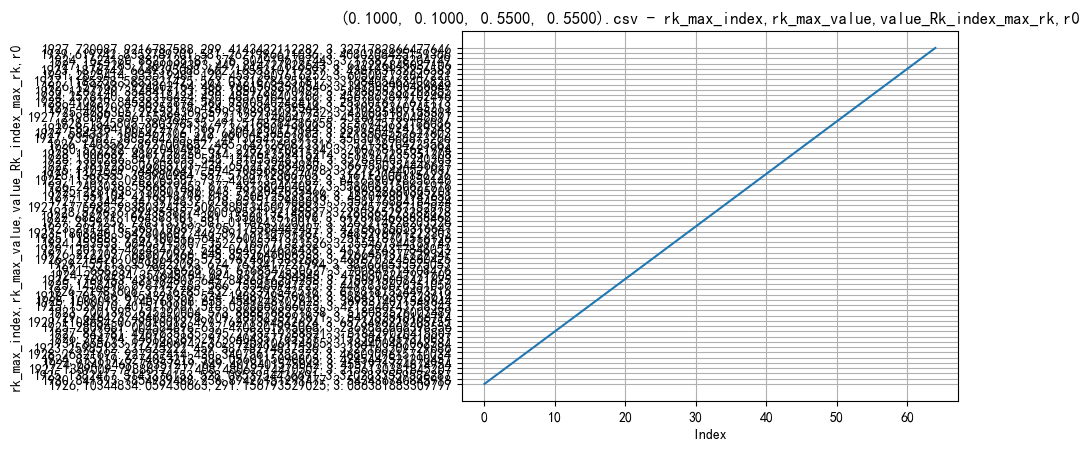

In [17]:
from support_code.draw_rank import plot_csv_files_in_directory

input_file = "Ranks/csv"
output_file = "Ranks/img"
plot_csv_files_in_directory(directory=input_file, output_directory=output_file)

In [5]:
import os

def extract_file_names(directory, min_values, max_values):
    """
    从指定目录中提取符合指定范围的文件名列表。

    参数:
    directory (str): 包含文件的目录路径。
    min_values (tuple): 最小值的元组，如 (0.1000, 0.1000, 0.1000, 0.1000)。
    max_values (tuple): 最大值的元组，如 (0.1000, 0.1000, 0.1000, 1.0000)。

    返回:
    list: 符合范围条件的文件名列表。
    """
    file_names = os.listdir(directory)
    selected_file_names = []

    for file_name in file_names:
        # 从文件名中提取浮点数值，去除空格和其他字符
        values = tuple(map(float, file_name.strip('().csv').split(',')))

        # 检查每个值是否在范围内
        is_in_range = all(min_val <= val <= max_val for val, min_val, max_val in zip(values, min_values, max_values))

        if is_in_range:
            selected_file_names.append(file_name)

    return selected_file_names


# 示例用法
min_values = (0.1000, 1.0000, 1.0000, 1.0000)
max_values = (1.0000, 1.0000, 1.0000, 1.0000)
directory = 'MLP\csv'  # 替换为实际的目录路径
selected_files = extract_file_names(directory, min_values, max_values)
print(selected_files)


['(0.1000, 1.0000, 1.0000, 1.0000).csv', '(0.3250, 1.0000, 1.0000, 1.0000).csv', '(0.5500, 1.0000, 1.0000, 1.0000).csv', '(0.7750, 1.0000, 1.0000, 1.0000).csv', '(1.0000, 1.0000, 1.0000, 1.0000).csv']


In [12]:
def best_valid_acc(input_dir="csv文件所在位置",  output_dir="png文件输出的位置", csv_list = None):
    # 列出包含数据的CSV文件
    csv_files = [file for file in os.listdir(input_dir) if file in csv_list]
    print(csv_files)

    # 创建字典用于保存最大值
    max_values = {}

    # 循环处理每个CSV文件
    for i, csv_file in enumerate(csv_files):
        scale_key = csv_file.split(".csv")[0]
        # 构建CSV文件的完整路径
        csv_path = os.path.join(input_dir, csv_file)

        # 读取CSV文件为DataFrame
        df = pd.read_csv(csv_path)

        # 获取横坐标和纵坐标数据
        x_data = range(len(df.iloc[:,4]))
        y_data = df.iloc[:, 4]  # 第三列作为纵坐标
         # 计算最大值并保存到字典
        max_value = y_data.max()
        # key = f"scale=0.{scale_index}"
        max_values[scale_key] = max_value

    # 打印保存的最大值字典
    print("最大值字典:")
    for key, value in max_values.items():
        print(f"{key}: {value}")

    # 绘制子图
    plt.plot(range(len(max_values.keys())), max_values.values() )
    plt.title("观察valid中最大准确率的变化")  # 使用文件名作为子图标题
    plt.ylabel("max_valid_accuracy")  #为横坐标轴标签
    plt.xlabel("scale")  # 使用第三列列名作为纵坐标轴标签
    plt.grid()

    # 保存子图
    input_filename = os.path.join(output_dir, "观察valid中最大准确率的变化.png")  # 文件名与题目一致，去除扩展名并添加.png后缀
    plt.savefig(input_filename)


In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

# 指定存储图像的目录
input_dir = 'LeNet/csv'
output_dir = 'LeNet/img'
# 如果目录不存在，创建它
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
if not os.path.exists(input_dir):
    os.makedirs(input_dir)

def best_valid_acc(input_dir="csv文件所在位置", output_dir="png文件输出的位置", group_size=50):
    # 列出包含数据的CSV文件
    csv_files = [file for file in os.listdir(input_dir) if file.endswith('.csv')]

    # 将文件名分组，每组包含 group_size 个文件
    grouped_files = [csv_files[i:i + group_size] for i in range(0, len(csv_files), group_size)]

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for group_index, group in enumerate(grouped_files):
        # 创建字典用于保存最大值
        max_values = {}

        # 循环处理每个CSV文件
        for i, csv_file in enumerate(group):
            scale_key = csv_file.split(".csv")[0]
            # 构建CSV文件的完整路径
            csv_path = os.path.join(input_dir, csv_file)

            # 读取CSV文件为DataFrame
            df = pd.read_csv(csv_path)

            # 获取横坐标和纵坐标数据
            x_data = range(len(df.iloc[:, 4]))
            y_data = df.iloc[:, 4]
            
            # 计算最大值并保存到字典
            max_value = y_data.max()
            max_values[scale_key] = max_value

        # 打印保存的最大值字典
        # print(f"最大值字典 - Group {group_index + 1}:")
        # for key, value in max_values.items():
        #     print(f"{key}: {value}")

        # 绘制子图
        plt.figure()
        plt.plot(range(len(max_values.keys())), max_values.values())
        plt.title(f"观察valid中最大准确率的变化 - Group {group_index + 1}")
        plt.ylabel("max_valid_accuracy")
        plt.xlabel("scale")
        plt.grid()

        # 保存子图
        input_filename = os.path.join(output_dir, f"观察valid中最大准确率的变化_Group{group_index + 1}.png")
        plt.savefig(input_filename)
        plt.close()  # 关闭图形，以便绘制下一个子图

# 示例用法
best_valid_acc(input_dir, output_dir, 25)


In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

# 指定存储图像的目录
input_dir = 'LeNet/csv'
output_dir = 'LeNet/img'
# 如果目录不存在，创建它
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
if not os.path.exists(input_dir):
    os.makedirs(input_dir)

def best_valid_acc_group_index(input_dir="csv文件所在位置", output_dir="png文件输出的位置", group_size=50, file_interval=5):
    # 列出包含数据的CSV文件
    csv_files = [file for file in os.listdir(input_dir) if file.endswith('.csv')]

    # 将文件名分组，每组包含 group_size 个文件
    grouped_files = [csv_files[i:i + group_size] for i in range(0, len(csv_files), group_size)]

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for group_index, group in enumerate(grouped_files):
        # 创建字典用于保存最大值
        max_values = {}

        # 循环处理每个CSV文件，间隔为file_interval
        for i in range(0, len(group), file_interval):
            csv_file = group[i]
            scale_key = csv_file.split(".csv")[0]
            # 构建CSV文件的完整路径
            csv_path = os.path.join(input_dir, csv_file)

            # 读取CSV文件为DataFrame
            df = pd.read_csv(csv_path)

            # 获取横坐标和纵坐标数据
            x_data = range(len(df.iloc[:, 4]))
            y_data = df.iloc[:, 4]
            
            # 计算最大值并保存到字典
            max_value = y_data.max()
            max_values[scale_key] = max_value

        # 绘制子图
        plt.figure()
        plt.plot(range(len(max_values.keys())), max_values.values())
        plt.title(f"观察valid中最大准确率的变化 - Group {group_index + 1}- index {file_interval}")
        plt.ylabel("max_valid_accuracy")
        plt.xlabel("scale")
        plt.grid()

        # 保存子图
        input_filename = os.path.join(output_dir, f"Group{group_index + 1}_index{file_interval}.png")
        plt.savefig(input_filename)
        plt.close()  # 关闭图形，以便绘制下一个子图

# 示例用法，间隔5个文件读取
best_valid_acc(input_dir, output_dir, 25, 5)


In [35]:
base_min_values = (0.1000, 0.3250, 0.7750, 1.0000)
base_max_values = (1.0000, 0.3250, 0.7750, 1.0000)

# 创建包含多个元组的列表
param_list = []

for value in (0.1000,0.3250, 0.5500, 0.7750, 1.0000):
    min_values = (0.1000, value, value, value)
    max_values = (1.0000, value, value, value)
    param_list.append((min_values, max_values))

print(param_list[0][0])


(0.1, 0.1, 0.1, 0.1)


In [15]:
import os
import pandas as pd

def calculate_mean_and_variance(csv_folder):
    # 初始化一个DataFrame来保存所有CSV文件的数据
    all_data = pd.DataFrame()

    # 遍历文件夹中的所有CSV文件
    for csv_file in os.listdir(csv_folder):
        if csv_file.endswith('.csv'):
            csv_path = os.path.join(csv_folder, csv_file)
            try:
                # 读取CSV文件为DataFrame
                df = pd.read_csv(csv_path, delimiter=',')  # 这里的csv文件采用","实现分离
                
                # 计算每列的平均值和方差
                column_means = df.mean()
                column_variances = df.var()
                
                # 将结果添加到all_data中
                all_data = pd.concat([all_data, column_means.rename(f'{csv_file}_mean'), column_variances.rename(f'{csv_file}_variance')], axis=1)
            except Exception as e:
                print(f"Error processing file {csv_file}: {str(e)}")
    
    return all_data


if __name__ == "__main__":
    # 指定包含CSV文件的文件夹路径（使用原始字符串）
    csv_folder = r'Ranks\csv'

    # 计算平均值和方差
    result_data = calculate_mean_and_variance(csv_folder)

    print(result_data)

    # 指定保存结果的CSV文件路径
    result_csv_file = r'Ranks\img\result.csv'

    # 将包含所有CSV文件数据的DataFrame保存为结果CSV文件
    # result_data.to_csv(result_csv_file, index=False)


                       (0.1000, 0.1000, 0.1000, 0.1000).csv_mean  \
rk_max_index                                        1.926400e+03   
rk_max_value                                        1.548606e+07   
value_Rk_index_max_rk                               4.228058e+02   
r0                                                  3.324182e+00   

                       (0.1000, 0.1000, 0.1000, 0.1000).csv_variance  \
rk_max_index                                            5.300000e+00   
rk_max_value                                            7.359279e+14   
value_Rk_index_max_rk                                   2.863286e+04   
r0                                                      3.339723e-02   

                       (0.1000, 0.1000, 0.1000, 0.3250).csv_mean  \
rk_max_index                                        1.926400e+03   
rk_max_value                                        6.169152e+06   
value_Rk_index_max_rk                               4.277090e+02   
r0                        

In [29]:
import numpy as np

# 提取均值和方差的列名
mean_columns = [column for column in result_data.columns if column.endswith("_mean")]
variance_columns = [column for column in result_data.columns if column.endswith("_variance")]

# 初始化一个列表来存储4个numpy矩阵
matrix_list = []

# 遍历每一行，将均值和方差数据分别存储到numpy数组中
for _, row in result_data.iterrows():
    mean_values = row[mean_columns].values
    variance_values = row[variance_columns].values
    combined_data = np.column_stack((mean_values, variance_values))  # 将均值和方差列合并为一个numpy数组
    matrix_list.append(combined_data)

# 将列表转换为numpy数组，每个元素对应一个矩阵
result_matrices = np.array(matrix_list)

# result_matrices 现在是一个形状为 (4, 625, 2) 的numpy数组
# 每个矩阵对应一行，每个矩阵包含两列分别对应均值和方差，共有625列


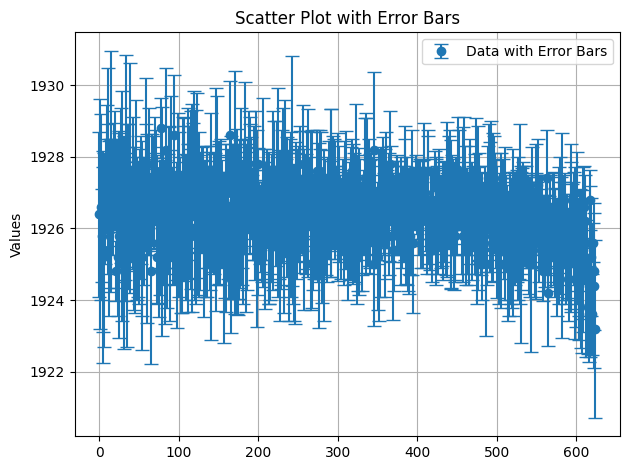

In [28]:
def scatter_plot_with_error_bars(data, x_labels=None, y_label=None, title=None):
    """
    绘制带有误差棒的散点图。

    参数:
    data (numpy.ndarray): 二维 numpy 矩阵，第一列为均值，第二列为方差。
    x_labels (list, optional): x 轴标签列表，与数据点一一对应。默认为 None。
    y_label (str, optional): y 轴标签。默认为 None。
    title (str, optional): 图表标题。默认为 None。

    返回:
    None
    """
    if data.shape[1] != 2:
        raise ValueError("输入数据必须是一个二维numpy矩阵，第一列为均值，第二列为方差。")

    x_values = range(len(data))
    y_values = data[:, 0]  # 提取均值列
    error_values = np.sqrt(data[:, 1])  # 提取方差列并计算标准差作为误差

    plt.errorbar(x_values, y_values, yerr=error_values, fmt='o', capsize=5, label='Data with Error Bars')

    if x_labels:
        plt.xticks(x_values, x_labels, rotation=45, ha='right')

    if y_label:
        plt.ylabel(y_label)

    if title:
        plt.title(title)

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
scatter_plot_with_error_bars(result_matrices[0], y_label='Values', title='Scatter Plot with Error Bars')

In [9]:
from tqdm import tqdm
import time
angle_list = range(0,100,1)
for angle in tqdm(angle_list, desc="training", unit="epoch"):
    # print(angle)
    time.sleep(0.1)

training: 100%|██████████| 100/100 [00:10<00:00,  9.75epoch/s]


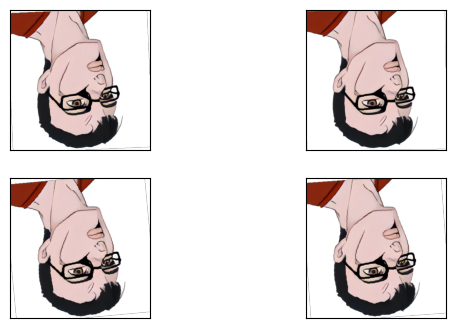

In [11]:
import torch
# from torch import torch_version
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt

# read the input image
img = Image.open('test.png')

# define a transform to rotate the image
transform = T.RandomRotation(degrees = (-180,-170))

# save four output images applying the above transform
imgs = [transform(img) for _ in range(4)]
fig = plt.figure(figsize=(7,4))
rows, cols = 2,2
for j in range(0, len(imgs)):
   fig.add_subplot(rows, cols, j+1)
   plt.imshow(imgs[j])
   plt.xticks([])
   plt.yticks([])
plt.show()

In [12]:
import os
path = 'Ranks/csv'
 
path_list = os.listdir(path)
print(path_list)

path_list.sort(key=lambda x:int(x.split('-')[0]))
 
 
print(path_list)
# path_list.sort(key=lambda x:int(x[:-4]))
 

for csv_file in path_list:
    print(f"{csv_file}")

['1-180.0000, -170.0000.csv', '10-90.0000, -80.0000.csv', '11-80.0000, -70.0000.csv', '12-70.0000, -60.0000.csv', '13-60.0000, -50.0000.csv', '14-50.0000, -40.0000.csv', '15-40.0000, -30.0000.csv', '16-30.0000, -20.0000.csv', '17-20.0000, -10.0000.csv', '18-10.0000, 0.0000.csv', '19-0.0000, 10.0000.csv', '2-170.0000, -160.0000.csv', '20-10.0000, 20.0000.csv', '21-20.0000, 30.0000.csv', '22-30.0000, 40.0000.csv', '23-40.0000, 50.0000.csv', '24-50.0000, 60.0000.csv', '25-60.0000, 70.0000.csv', '26-70.0000, 80.0000.csv', '27-80.0000, 90.0000.csv', '28-90.0000, 100.0000.csv', '29-100.0000, 110.0000.csv', '3-160.0000, -150.0000.csv', '30-110.0000, 120.0000.csv', '31-120.0000, 130.0000.csv', '32-130.0000, 140.0000.csv', '33-140.0000, 150.0000.csv', '34-150.0000, 160.0000.csv', '35-160.0000, 170.0000.csv', '36-170.0000, 180.0000.csv', '4-150.0000, -140.0000.csv', '5-140.0000, -130.0000.csv', '6-130.0000, -120.0000.csv', '7-120.0000, -110.0000.csv', '8-110.0000, -100.0000.csv', '9-100.0000, -9

In [3]:
min_angle_list = range(0,1,1)
print(list(min_angle_list))

[0]


In [9]:
list(range(-6,1,1))

[-6, -5, -4, -3, -2, -1, 0]